<a href="https://colab.research.google.com/github/LiquidRonnie/Project-2/blob/main/FbProphet_Seas_lvl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import files
uploaded = files.upload()

Saving Fort Pulaski, GA.csv to Fort Pulaski, GA (1).csv


In [27]:
# import numpy, pandas for data manipulation
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt

In [28]:
weather_data = pd.read_csv('Fort Pulaski, GA.csv')
weather_data

,Station_ID,date,Monthly_MSL,Monthly_Avg_Temp
0,"Pulaski, GA",1979-1,-0.229,45.3
1,"Pulaski, GA",1979-2,-0.079,46.8
2,"Pulaski, GA",1979-3,-0.135,57.3
3,"Pulaski, GA",1979-4,-0.072,64.9
4,"Pulaski, GA",1979-5,-0.108,72.4
...,...,...,...,...
503,"Pulaski, GA",2021-2,0.200,50.7
504,"Pulaski, GA",2021-3,0.219,51.5
505,"Pulaski, GA",2021-4,0.164,60.5
506,"Pulaski, GA",2021-5,0.102,65.0


In [50]:
# Check Dataset shape
print(weather_data.shape)

# select the data and temperature columns
sea_lvl_df = weather_data[['date', 'Monthly_MSL']]

# rename column
sea_lvl_df = sea_lvl_df.rename(columns={'date':'ds','Monthly_MSL':'y'})

sea_lvl_df.head(10)

(508, 4)


,ds,y
0,1979-1,-0.229
1,1979-2,-0.079
2,1979-3,-0.135
3,1979-4,-0.072
4,1979-5,-0.108
5,1979-6,0.017
6,1979-7,0.037
7,1979-8,-0.072
8,1979-9,-0.062
9,1979-10,-0.158


In [51]:
sea_lvl_df['ds'] = pd.to_datetime(sea_lvl_df['ds'])
sea_lvl_df

,ds,y
0,1979-01-01,-0.229
1,1979-02-01,-0.079
2,1979-03-01,-0.135
3,1979-04-01,-0.072
4,1979-05-01,-0.108
...,...,...
503,2021-02-01,0.200
504,2021-03-01,0.219
505,2021-04-01,0.164
506,2021-05-01,0.102


In [52]:
# select the subset datea from 2015 - 2019
# mask = (temp_df['ds'] >= '2018-01-01') & (temp_df['ds'] <= '2021-05-04')
# temp_df = temp_df.loc[mask]

# iunpect first 5 rows and loast 5 rows of the data
from IPython.display import display
display(temp_df.head(5))
display(temp_df.tail(5))

,ds,y
0,1979-01-01,-0.229
1,1979-02-01,-0.079
2,1979-03-01,-0.135
3,1979-04-01,-0.072
4,1979-05-01,-0.108


,ds,y
503,2021-02-01,0.200
504,2021-03-01,0.219
505,2021-04-01,0.164
506,2021-05-01,0.102
507,2021-06-01,0.107


In [53]:
# describe
sea_lvl_df.describe()

,y
count,508.000000
mean,0.027654
std,0.091387
min,-0.229000
25%,-0.041000
50%,0.022500
75%,0.092250
max,0.258000


In [54]:
# Output the max and min temps
print(sea_lvl_df.loc[temp_df['y'] == sea_lvl_df['y'].max()])
print(sea_lvl_df.loc[temp_df['y'] == sea_lvl_df['y'].min()])

            ds      y
199 1995-08-01  0.258
480 2019-03-01  0.258
488 2019-11-01  0.258
          ds      y
0 1979-01-01 -0.229


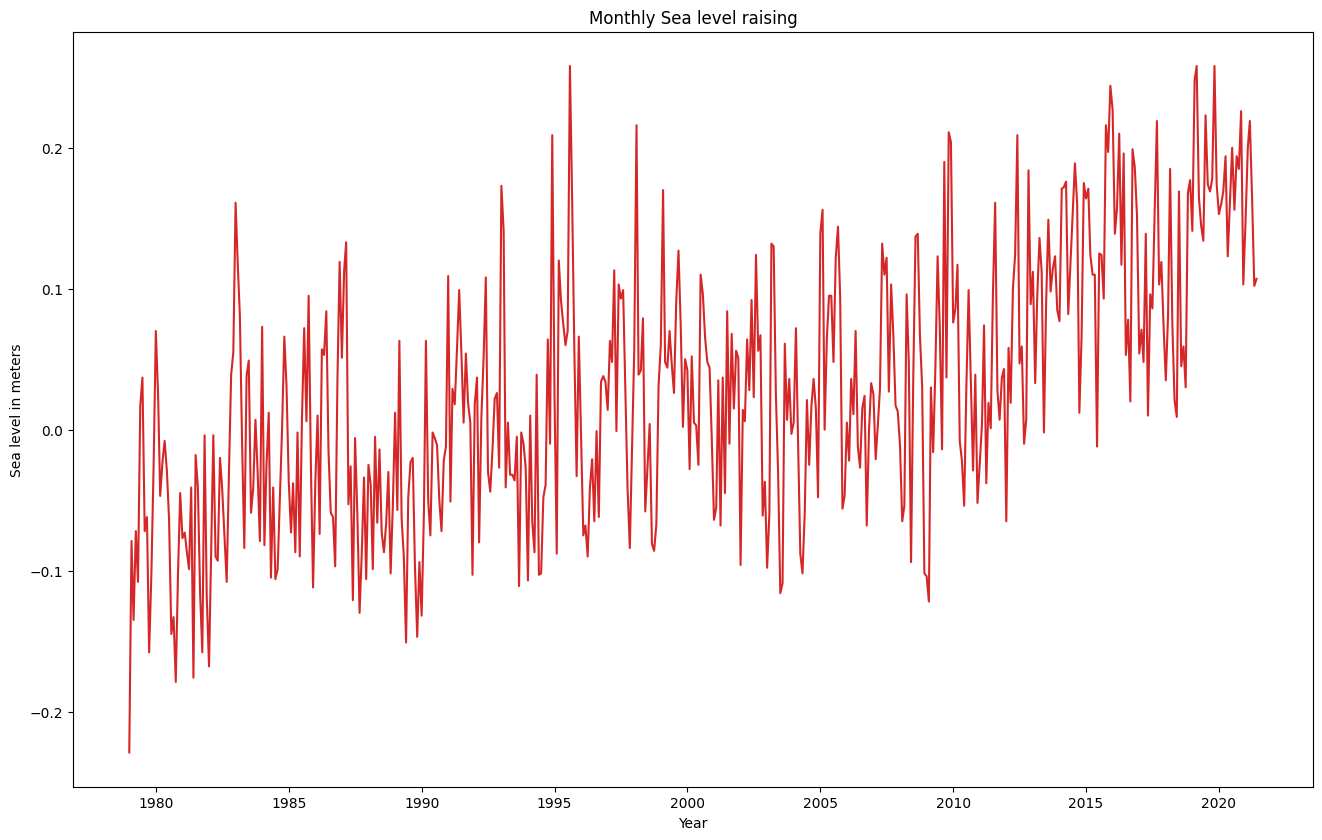

In [55]:
# plot the daily temperature change
plt.figure(figsize=(16,10), dpi=100)
plt.plot(sea_lvl_df.ds, sea_lvl_df.y, color='tab:red')
plt.gca().set(title='Monthly Sea level raising', xlabel='Year', ylabel='Sea level in meters')
plt.show()

In [56]:
# import Prophet
from fbprophet import Prophet

In [57]:
# Initialize Model
model = Prophet(seasonality_mode='multiplicative', mcmc_samples=200)
model.fit(sea_lvl_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
model.component_modes

{'additive': ['additive_terms', 'extra_regressors_additive'],
 'multiplicative': ['yearly',
  'multiplicative_terms',
  'extra_regressors_multiplicative',
  'holidays']}

In [38]:
# Create future dates of 365 days
future_dates = model.make_future_dataframe(periods=120, freq='MS')

In [39]:
future_dates.tail()

,ds
623,2031-02-01
624,2031-03-01
625,2031-04-01
626,2031-05-01
627,2031-06-01


In [40]:
prediction = model.predict(future_dates)

In [41]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1979-01-01,-0.037969,-0.134058,0.052815,-0.048965,-0.027821,0.060691,-0.328431,0.458311,0.060691,-0.328431,0.458311,0.0,0.0,0.0,-0.040273
1,1979-02-01,-0.037720,-0.137602,0.044012,-0.048690,-0.027686,0.165319,-0.197482,0.525192,0.165319,-0.197482,0.525192,0.0,0.0,0.0,-0.043956
2,1979-03-01,-0.037495,-0.192659,0.001067,-0.048411,-0.027562,1.696769,0.859902,2.768762,1.696769,0.859902,2.768762,0.0,0.0,0.0,-0.101115
3,1979-04-01,-0.037246,-0.135213,0.046127,-0.048063,-0.027412,0.323399,-0.258752,0.882225,0.323399,-0.258752,0.882225,0.0,0.0,0.0,-0.049291
4,1979-05-01,-0.037005,-0.154416,0.030096,-0.047749,-0.027303,0.604132,0.025800,1.145282,0.604132,0.025800,1.145282,0.0,0.0,0.0,-0.059360


In [42]:
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
623,2031-02-01,0.171859,0.062160,0.276943
624,2031-03-01,0.398797,0.248542,0.525860
625,2031-04-01,0.196291,0.068394,0.324314
626,2031-05-01,0.238620,0.114831,0.354181
627,2031-06-01,0.036057,-0.089577,0.159035


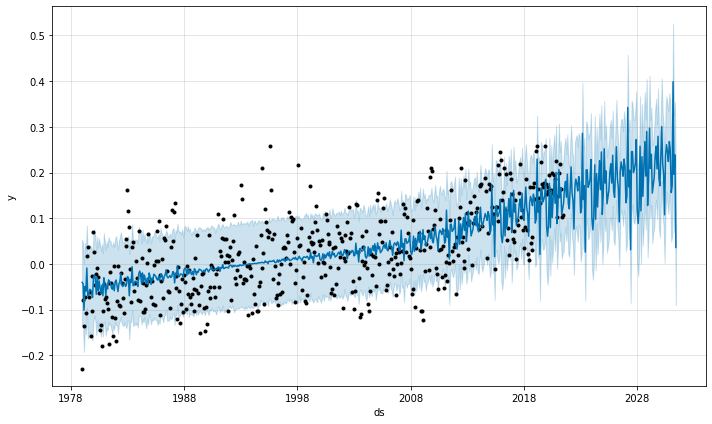

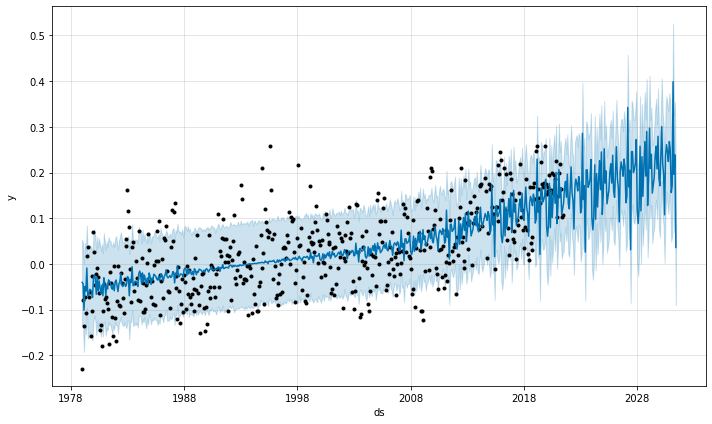

In [43]:
### plot the predicted projection
model.plot(prediction)

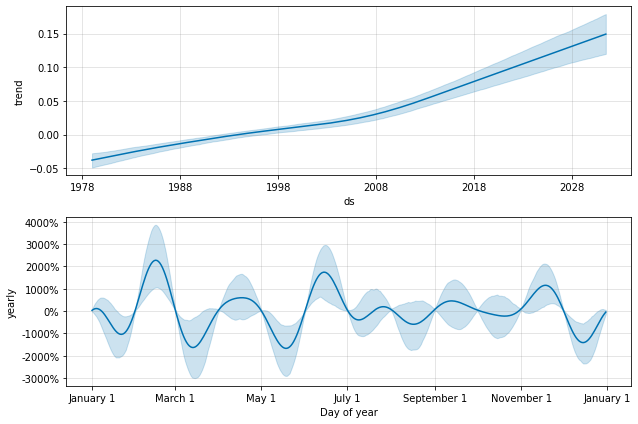

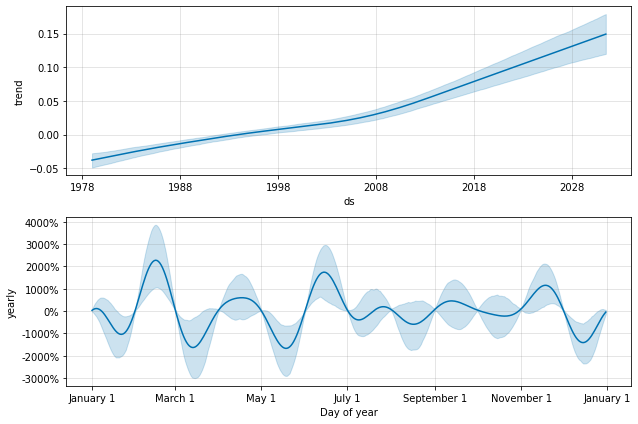

In [44]:
# plot trend, yearly seasonality of the time series. 
model.plot_components(prediction)

In [45]:
from fbprophet.plot import plot_plotly, plot_components_plotly

### plot the predicted projection - interactive

plot_plotly(model, prediction)

In [46]:
# plot trend, yearly seasonality of the time series. - interactiveb

plot_components_plotly(model, prediction)

In [47]:
from fbprophet.diagnostics import cross_validation
# Creat cross validation

cutoffs = pd.date_range(start='2018-01-01', end='2020-01-01', freq='3MS')

cross_val = cross_validation(model, horizon='90 days', cutoffs=cutoffs)
cross_val.head()

  0%|          | 0/9 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-02-01,0.104137,0.005119,0.204478,0.081,2018-01-01
1,2018-03-01,0.125951,0.024841,0.218967,0.185,2018-01-01
2,2018-04-01,0.114975,0.004543,0.214034,0.075,2018-01-01
3,2018-05-01,0.116314,0.014830,0.207790,0.021,2018-04-01
4,2018-06-01,0.040814,-0.060276,0.137683,0.009,2018-04-01


In [48]:
# obtain performance metrics
from fbprophet.diagnostics import performance_metrics
p_metrics = performance_metrics(cross_val)
p_metrics.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,30 days,0.004592,0.067764,0.052632,2.303698,2.303698,1.000000
1,31 days,0.012607,0.112283,0.096159,0.784210,0.567907,0.428571
2,59 days,0.003607,0.060056,0.060048,0.277901,0.277901,1.000000
3,60 days,0.009113,0.095461,0.090478,0.496666,0.517308,0.500000
4,61 days,0.006085,0.078005,0.058013,1.231606,0.683459,0.750000


Coverage = the difference between the yhat_lower and yhat_upper


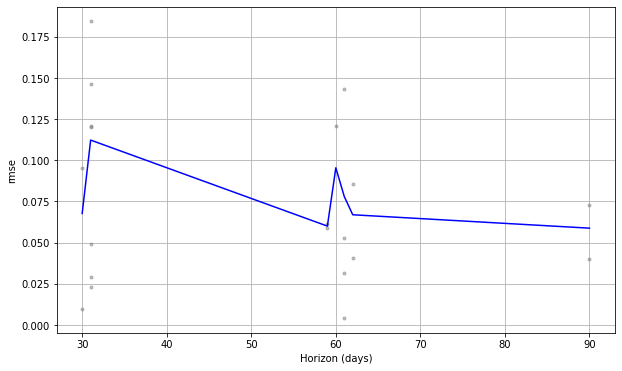

In [49]:
# plot RMSE graph

from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cross_val, metric='rmse')


In [58]:
import json
from fbprophet.serialize import model_to_json, model_from_json

with open('sea_lvl_prophet_model.json', 'w') as fout:
    json.dump(model_to_json(model), fout)  # Save model

# with open('serialized_model.json', 'r') as fin:
#     m = model_from_json(json.load(fin))  # Load model